In [1]:
import os, sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def orders(num_customerBase):
    return 0.2123*num_customerBase

def G(m, M):
    p= 0.8*(1.25-(np.e)**(-m/5))
    return 38/40 + 1/40*((0.45+p)**0.3+ (M/5+1)**0.05), p

In [3]:
0.01e6

10000.0

In [4]:
%%time

co= 1.02e6
INR_day= 15e6
Mo= 5e6
profit_margin= 0.2
AOV= 300
intial_INR= 15e6
dmap={
    'm_init':[],
    'M_init':[],
    'm_rate':[],
    'M_rate':[],
    'INR_30thDay':[],
    'customerBase_30thDay':[],
    'p':[]
}

cb_max=-1

for m in np.linspace(0, 10, 20):
    for M in np.linspace(0, 10, 20):
        if (m*1e6+M*1e6+Mo)> INR_day:
            break
        m_init=m 
        M_init=M
        for m_rate in np.linspace(0.0001, 0.01, 100):
            for M_rate in np.linspace(0.0001, 0.01, 100):
                m= m_init
                M= M_init
                customerBase= co
                INR_day= intial_INR
                flag=True
                for i in range(30):
                    if (m*1e6+M*1e6+Mo)> intial_INR:
                        break
                    g, p= G(m, M)
                    if g<=1:
                        flag=False
                        break

                    customerBase= int(g*customerBase)
                    total_orders= int(orders(customerBase))
                    total_money= total_orders*AOV
                    profit= profit_margin*total_money

                    INR_day_nxt= INR_day-Mo-(m*1e6)-(M*1e6)+profit
                    if INR_day_nxt<INR_day:
                        flag=False
                        break
                    INR_day=INR_day_nxt
                    #cb.append(customerBase)
                    #print(m)
                    m+=(m_rate)*i
                    M+= (M_rate)*i

                if flag:
                    cb_max= max(cb_max, customerBase)
                    #print(g, m_init, M_init, p, customerBase, INR_day, m_rate, M_rate)
                    dmap['m_init'].append(m_init)
                    dmap['M_init'].append(M_init)
                    dmap['m_rate'].append(m_rate)
                    dmap['M_rate'].append(M_rate)
                    dmap['INR_30thDay'].append(INR_day)
                    dmap['customerBase_30thDay'].append(customerBase)
                    dmap['p'].append(p)
                    

CPU times: total: 24.9 s
Wall time: 24.9 s


In [9]:
ind_max= dmap['customerBase_30thDay'].index(cb_max)
print('maximum customer base at 30th day', cb_max)

maximum customer base at 30th day 1083956


In [10]:
dmap['m_init'][ind_max], dmap['M_init'][ind_max]

(6.904210526315788, 1.0526315789473684)

In [23]:
ind_max= dmap['customerBase_30thDay'].index(cb_max)
m_rate= dmap['m_rate'][ind_max]
M_rate= dmap['M_rate'][ind_max]

m= dmap['m_init'][ind_max]
M= dmap['M_init'][ind_max]
print(m, M, m_rate, M_rate)

6.904210526315788 1.0526315789473684 0.0019000000000000002 0.0001


In [13]:
0.0019*1e6, 0.0001*1e6

(1900.0, 100.0)

In [14]:
customerBase= co
INR_day= intial_INR
INR_list, customerBase_list=[INR_day], [customerBase]
flag=True
day_list=[0]
total_order_list=[]
m_list=[]
M_list=[]
for i in range(30):
    m_list.append(m)
    M_list.append(M)
    g, p= G(m, M)
    if g<=1:
        flag=False
        break
    customerBase= int(g*customerBase)
    total_orders= int(orders(customerBase))
    total_money= total_orders*AOV
    profit= profit_margin*total_money

    INR_day_nxt= INR_day-Mo-(m*1e6)-(M*1e6)+profit
    if INR_day_nxt<INR_day:
        flag=False
        break
    m+=(m_rate)*i
    M+= (M_rate)*i
    
    INR_day=INR_day_nxt
    INR_list.append(INR_day)
    customerBase_list.append(customerBase)
    day_list.append(i+1)
    total_order_list.append(total_orders)

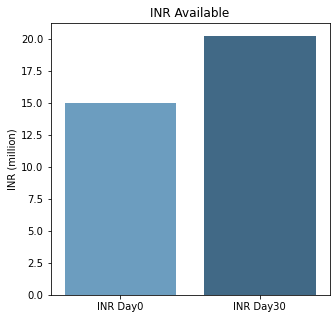

In [15]:
plt.figure(figsize=(5, 5))
sns.barplot(y=[INR_list[0]/1e6, INR_list[-1]/1e6], x=['INR Day0', 'INR Day30'],
               palette="Blues_d")

plt.title('INR Available')
plt.ylabel('INR (million)')
plt.show()

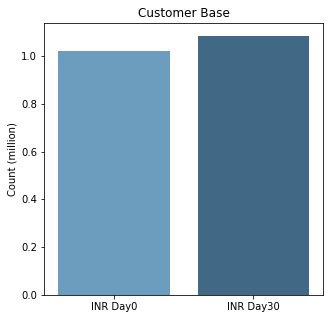

In [16]:
plt.figure(figsize=(5, 5))
sns.barplot(y=[customerBase_list[0]/1e6, customerBase_list[-1]/1e6], x=['INR Day0', 'INR Day30'],
               palette="Blues_d")

plt.title('Customer Base')
plt.ylabel('Count (million)')
plt.show()

In [17]:
dmap['p'][ind_max]

0.8276564923984027

In [18]:
((customerBase_list[-1]- customerBase_list[0])/customerBase_list[0])*100, ((INR_list[-1]- INR_list[0])/INR_list[0])*100

(6.270196078431373, 35.056645614035034)

In [19]:
INR_list[-1]/1e6, customerBase_list[-1]/1e6

(20.258496842105256, 1.083956)

In [20]:
cb_prev= customerBase_list[:-1]
cb_next= customerBase_list[1:]

inr_prev= INR_list[:-1]
inr_next= INR_list[1:]

In [22]:
final_dmap={
    'day': day_list[1:],
    'Capital Available at the start of day': inr_prev,
    'Customer Base at the start of day': cb_prev,
    'm (million)':m_list,
    'p (probability)':p,
    'M (million)':M_list,
    'G':g,
    'Customer Base at end of the day': cb_next,
    'total orders':total_order_list,
    'Capital Available at end of the day':inr_next
}
df= pd.DataFrame(final_dmap)
df

,day,Capital Available at the start of day,Customer Base at the start of day,m (million),p (probability),M (million),G,Customer Base at end of the day,total orders,Capital Available at end of the day
0,1,1.500000e+07,1020000.0,6.904211,0.827656,1.052632,1.002155,1022003,216971,1.506142e+07
1,2,1.506142e+07,1022003.0,6.904211,0.827656,1.052632,1.002155,1024010,217397,1.514840e+07
2,3,1.514840e+07,1024010.0,6.906111,0.827656,1.052732,1.002155,1026021,217824,1.525899e+07
3,4,1.525899e+07,1026021.0,6.909911,0.827656,1.052932,1.002155,1028037,218252,1.539127e+07
4,5,1.539127e+07,1028037.0,6.915611,0.827656,1.053232,1.002155,1030059,218681,1.554329e+07
5,6,1.554329e+07,1030059.0,6.923211,0.827656,1.053632,1.002155,1032087,219112,1.571317e+07
6,7,1.571317e+07,1032087.0,6.932711,0.827656,1.054132,1.002155,1034121,219543,1.589891e+07
7,8,1.589891e+07,1034121.0,6.944111,0.827656,1.054732,1.002155,1036162,219977,1.609868e+07
8,9,1.609868e+07,1036162.0,6.957411,0.827656,1.055432,1.002155,1038211,220412,1.631056e+07
9,10,1.631056e+07,1038211.0,6.972611,0.827656,1.056232,1.002155,1040268,220848,1.653260e+07


In [24]:
df.to_csv('Strategy2_growth.csv', index=False)

In [25]:
l=[]
for i in range(1, 30):
    l.append(customerBase_list[i+1]- customerBase_list[i])
len(l)

29

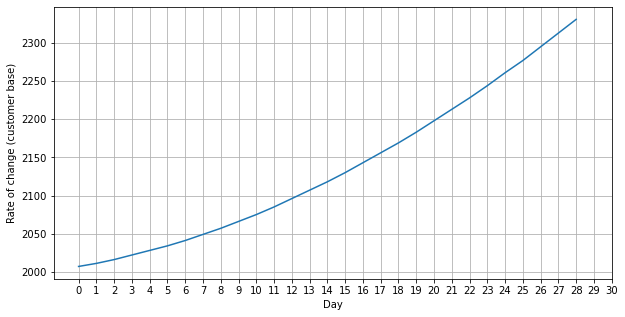

In [26]:
plt.figure(figsize=(10, 5))
plt.plot(l)
plt.grid()
plt.xticks(list(range(31)))
plt.xlabel('Day')
plt.ylabel('Rate of change (customer base)')
plt.show()